In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

pd.options.mode.chained_assignment = None

# Read the data
df = pd.read_csv(r'C:\Users\ALLAN KIPROP\Downloads\country_wise_latest.csv')

In [3]:
# Let's look at the data
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [10]:
# Data understanding and cleaning

df.info()
df.describe()
df.isnull().sum()
df.fillna(0, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

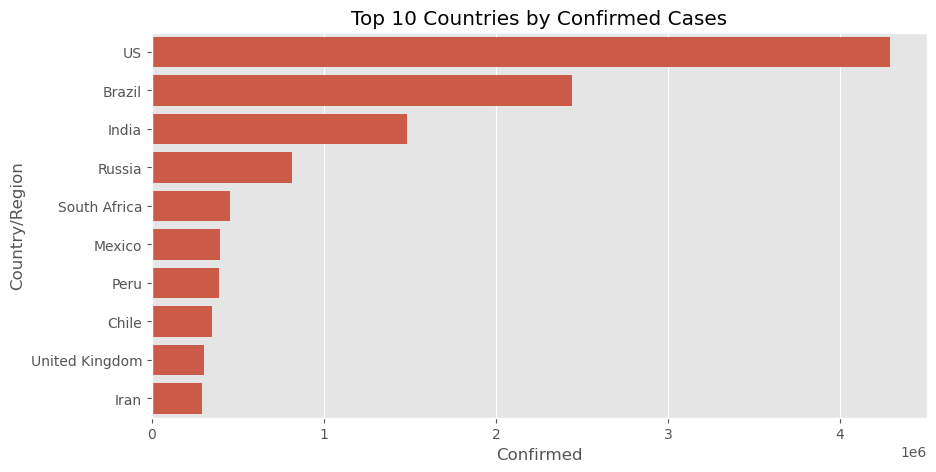

In [11]:
# Key Questions and Analysis
#Q1: Which countries have the highest confirmed cases?

top_confirmed = df.nlargest(10, 'Confirmed')[['Country/Region', 'Confirmed']]
plt.figure(figsize=(10,5))
sns.barplot(x='Confirmed', y='Country/Region', data=top_confirmed)
plt.title('Top 10 Countries by Confirmed Cases')
plt.show()


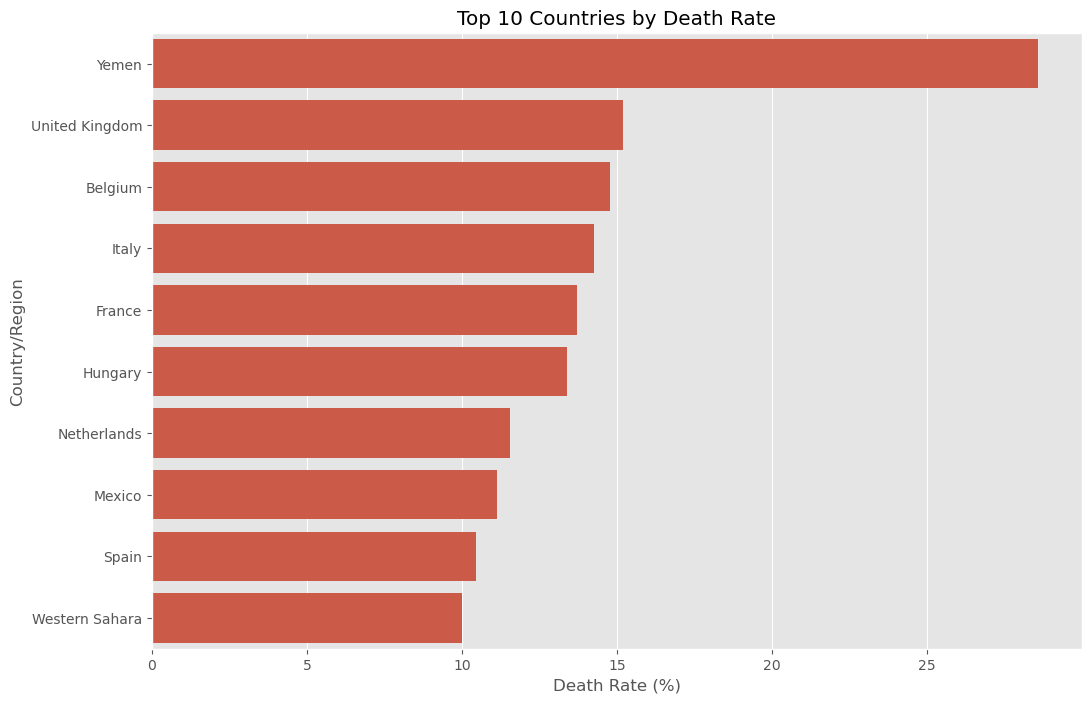

In [12]:
# Q2: Which countries have the highest death rate?

df['Death Rate (%)'] = (df['Deaths'] / df['Confirmed']) * 100
top_death = df.nlargest(10, 'Death Rate (%)')[['Country/Region', 'Death Rate (%)']]
sns.barplot(x='Death Rate (%)', y='Country/Region', data=top_death)
plt.title('Top 10 Countries by Death Rate')
plt.show()


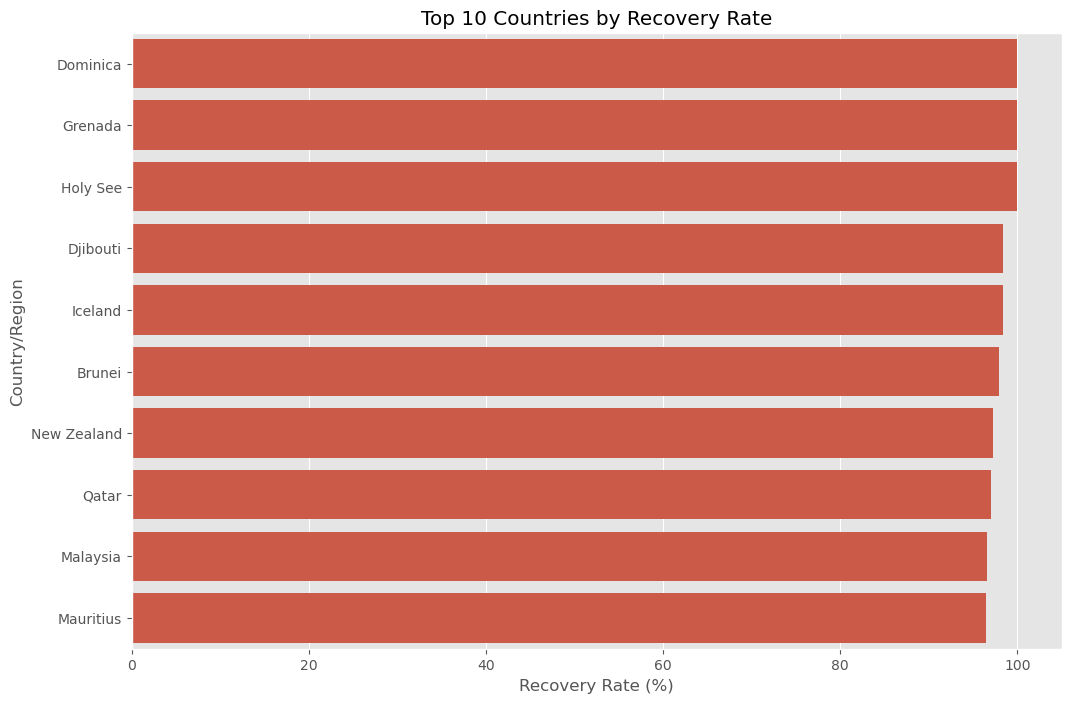

In [13]:
# Q3: Which countries have the best recovery rate?

df['Recovery Rate (%)'] = (df['Recovered'] / df['Confirmed']) * 100
top_recovery = df.nlargest(10, 'Recovery Rate (%)')[['Country/Region', 'Recovery Rate (%)']]
sns.barplot(x='Recovery Rate (%)', y='Country/Region', data=top_recovery)
plt.title('Top 10 Countries by Recovery Rate')
plt.show()


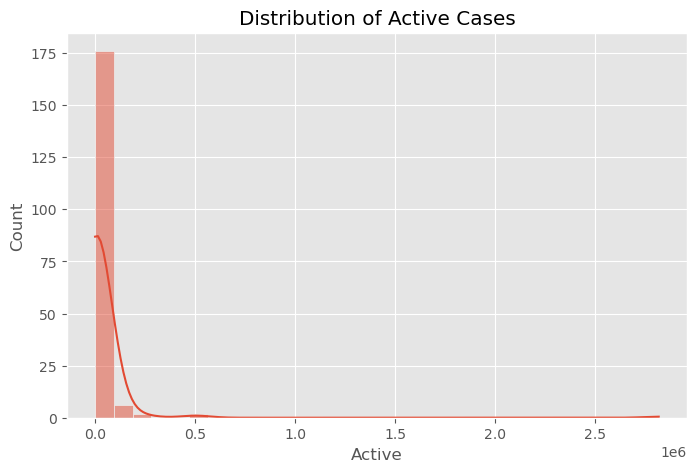

In [14]:
# Q4: Distribution of active cases

plt.figure(figsize=(8,5))
sns.histplot(df['Active'], bins=30, kde=True)
plt.title('Distribution of Active Cases')
plt.show()


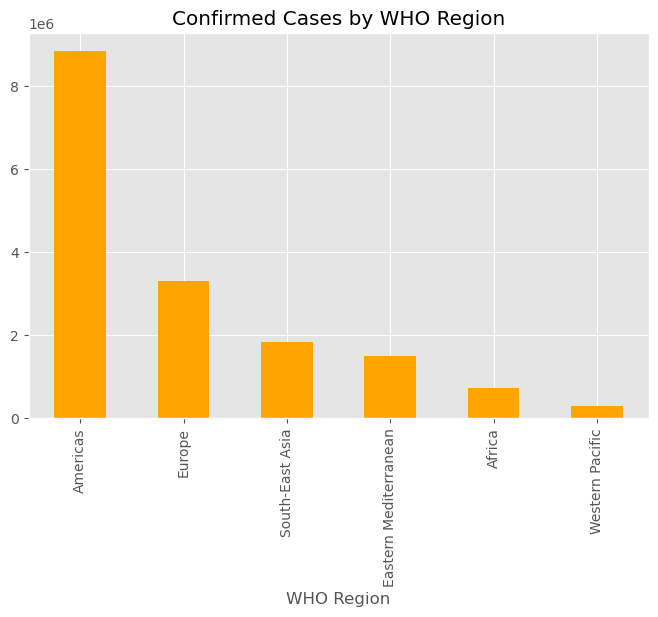

In [15]:
# Q5: Confirmed cases by WHO Region

region_cases = df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)
region_cases.plot(kind='bar', figsize=(8,5), color='orange', title='Confirmed Cases by WHO Region')
plt.show()


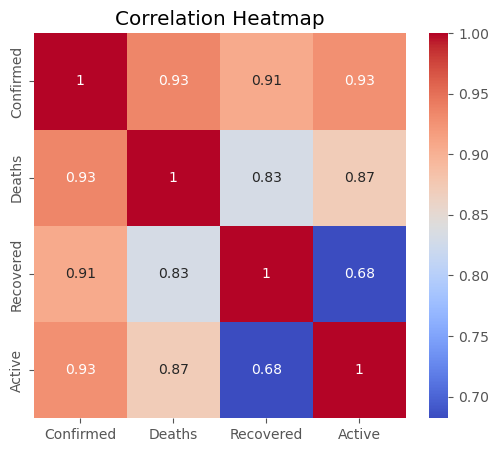

In [16]:
# Q6: Correlation between key metrics

plt.figure(figsize=(6,5))
sns.heatmap(df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Insights and Conclusions

##  Conclusions
1️⃣ The USA, India, and Brazil recorded the highest confirmed cases.  
2️⃣ Countries with better healthcare systems had higher recovery rates.  
3️⃣ There is a strong positive correlation between confirmed and recovered cases.  
4️⃣ WHO Regions like the Americas and Europe had the largest outbreak impact.  
5️⃣ Data visualization helps clearly show which countries handled COVID-19 better than others.